In [17]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt

In [18]:
# Hyper Parameters
input_size =1
output_size =1
num_epochs = 60
learning_rate = 0.01

In [19]:
# Toy Dataset
x_train = np.array([[3.3],[4.4],[5.5],[6.71],[6.93],[4.168],
                   [9.779],[6.182],[7.59],[2.167],[7.042],
                    [10.791],[5.313],[7.997],[3.1]],dtype=np.float32)

x_train

array([[ 3.3  ],
       [ 4.4  ],
       [ 5.5  ],
       [ 6.71 ],
       [ 6.93 ],
       [ 4.168],
       [ 9.779],
       [ 6.182],
       [ 7.59 ],
       [ 2.167],
       [ 7.042],
       [10.791],
       [ 5.313],
       [ 7.997],
       [ 3.1  ]], dtype=float32)

In [20]:
y_train = np.array([[1.7],[2.76],[2.09],[3.19],[1.694],[1.573],
                   [3.366],[2.596],[2.53],[1.221],[2.872],
                    [3.465],[1.65],[2.904],[1.3]],dtype=np.float32)

y_train

array([[1.7  ],
       [2.76 ],
       [2.09 ],
       [3.19 ],
       [1.694],
       [1.573],
       [3.366],
       [2.596],
       [2.53 ],
       [1.221],
       [2.872],
       [3.465],
       [1.65 ],
       [2.904],
       [1.3  ]], dtype=float32)

In [21]:
model = nn.Linear(input_size,output_size)

In [22]:
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(),lr=learning_rate)

In [25]:
#Train the model
for epoch in range(num_epochs):
    inputs = torch.from_numpy(x_train)
    targets = torch.from_numpy(y_train)
    
    #Forward pass
    outputs = model(inputs)
    loss = criterion(outputs,targets)
    
    #Backward and optimize
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    if (epoch+1) %5 ==0:
        print('Epoch [{}/{}], Loss: {:.4f}'.format(epoch+1,num_epochs,loss.item()))
    

Epoch [5/60], Loss: 0.3430
Epoch [10/60], Loss: 0.3386
Epoch [15/60], Loss: 0.3343
Epoch [20/60], Loss: 0.3302
Epoch [25/60], Loss: 0.3261
Epoch [30/60], Loss: 0.3222
Epoch [35/60], Loss: 0.3183
Epoch [40/60], Loss: 0.3146
Epoch [45/60], Loss: 0.3109
Epoch [50/60], Loss: 0.3073
Epoch [55/60], Loss: 0.3039
Epoch [60/60], Loss: 0.3005


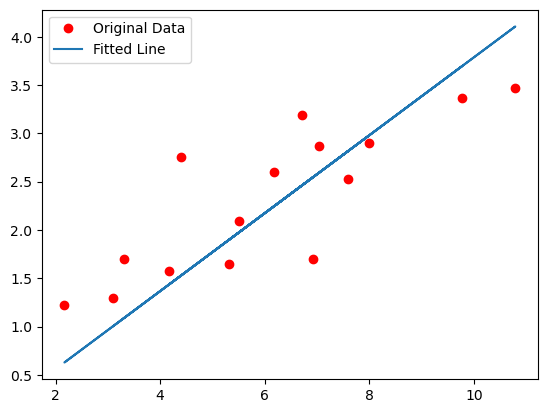

In [26]:
# Plot the graph
predicted = model(torch.from_numpy(x_train)).detach().numpy()
plt.plot(x_train,y_train,'ro',label='Original Data')
plt.plot(x_train,predicted,label='Fitted Line')
plt.legend()
plt.show()

In [27]:
# Saving Model
torch.save(model.state_dict(),'model.ckpt')